<a href="https://colab.research.google.com/github/shravanc/tensorflow_learning/blob/master/parkinson1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget --no-check-certificate \
      https://raw.githubusercontent.com/shravanc/datasets/master/parkinson_sample.csv \
      -O /content/parkinson_sample.csv

--2020-03-19 19:51:08--  https://raw.githubusercontent.com/shravanc/datasets/master/parkinson_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324250 (317K) [text/plain]
Saving to: ‘/content/parkinson_sample.csv’

/content/parkinson_ 100%[===================>] 316.65K  --.-KB/s    in 0.05s   

2020-03-19 19:51:08 (5.87 MB/s) - ‘/content/parkinson_sample.csv’ saved [324250/324250]



# Data Visualization

In [4]:
import pandas as pd

filename = '/content/parkinson_sample.csv'
df = pd.read_csv(filename)
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,25.6470,28.905,35.810,0.00340,0.000021,0.00178,0.00162,0.00533,0.01452,0.157,0.00711,0.00765,0.00926,0.02132,0.016636,25.986,0.42271,0.56963,0.11774
1,1,72,0,75.6570,30.670,39.340,0.00285,0.000013,0.00109,0.00136,0.00327,0.00979,0.089,0.00456,0.00584,0.00937,0.01367,0.004981,27.984,0.35842,0.52350,0.17555
2,1,72,0,68.6880,30.424,38.849,0.00340,0.000017,0.00161,0.00174,0.00482,0.03739,0.316,0.02120,0.02195,0.03069,0.06360,0.005567,25.399,0.45462,0.56983,0.16291
3,1,72,0,61.6690,30.177,38.353,0.00432,0.000028,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
4,1,72,0,89.6370,31.309,40.412,0.00290,0.000014,0.00124,0.00142,0.00371,0.01911,0.173,0.00862,0.01156,0.01737,0.02585,0.005320,27.200,0.44967,0.54700,0.18939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,42,61,0,65.7570,24.242,34.657,0.00306,0.000025,0.00140,0.00167,0.00421,0.01811,0.167,0.00805,0.00885,0.01335,0.02416,0.019214,24.689,0.55307,0.57152,0.11229
2096,42,61,0,106.7600,25.029,36.029,0.00249,0.000019,0.00124,0.00123,0.00373,0.01460,0.130,0.00775,0.00868,0.01144,0.02326,0.011046,24.737,0.52205,0.57030,0.11601
2097,42,61,0,-4.2597,19.725,28.634,0.00352,0.000027,0.00125,0.00169,0.00376,0.01708,0.159,0.00739,0.00914,0.01465,0.02216,0.009635,24.315,0.58904,0.57961,0.16296
2098,42,61,0,115.6500,24.402,35.402,0.00769,0.000066,0.00407,0.00425,0.01222,0.01657,0.162,0.00789,0.00892,0.01439,0.02367,0.062794,23.240,0.54095,0.59527,0.15142


# Data Distribution

In [5]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,21.500000,64.404762,0.333333,93.393790,20.961148,28.525276,0.006031,0.000043,0.002920,0.003212,0.008759,0.033489,0.305911,0.016903,0.019812,0.027102,0.050710,0.031594,21.747740,0.538971,0.652299,0.217377
std,12.123806,9.131039,0.471517,53.669701,8.129757,10.673869,0.005389,0.000034,0.002997,0.003691,0.008992,0.026101,0.232377,0.013523,0.016926,0.020530,0.040568,0.060153,4.292231,0.102144,0.070405,0.092894
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000900,0.000002,0.000400,0.000450,0.001210,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000304,1.659000,0.151020,0.519770,0.021983
25%,11.000000,58.000000,0.000000,47.217750,14.780000,21.110000,0.003490,0.000022,0.001558,0.001760,0.004668,0.018688,0.170000,0.008998,0.010530,0.015357,0.026985,0.010521,19.500250,0.465392,0.595222,0.152380
50%,21.500000,65.000000,0.000000,92.333000,20.470000,27.213500,0.004770,0.000033,0.002200,0.002420,0.006590,0.026980,0.247000,0.013430,0.015570,0.022205,0.040295,0.017671,21.982000,0.540975,0.642460,0.200170
75%,32.000000,72.000000,1.000000,140.320000,27.038250,35.392250,0.006632,0.000052,0.003250,0.003420,0.009750,0.039350,0.362000,0.020390,0.023428,0.032445,0.061173,0.030516,24.491250,0.613270,0.708835,0.263622
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.089290,0.000389,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.167020,0.275460,0.488020,0.748260,37.187000,0.935070,0.865600,0.731520


# Total number of features

In [6]:
all_columns = list(df.columns)
len(all_columns)

22

# Total number of empty data in each features


In [7]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

# Co-Relation between the dataset

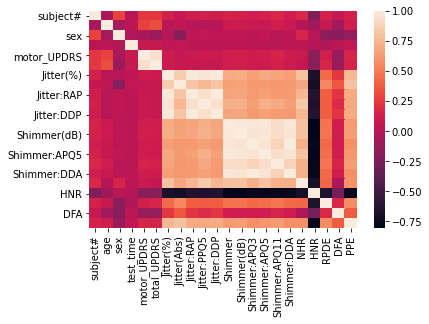

In [8]:
import seaborn as sns

#correlation matrix
sns.heatmap(df.corr());

# Checking for outliers

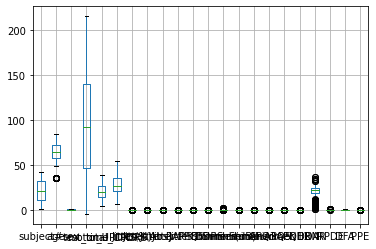

In [9]:
df.boxplot()

In [10]:
df.head(2)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,25.647,28.905,35.81,0.00340,0.000021,0.00178,0.00162,0.00533,0.01452,0.157,0.00711,0.00765,0.00926,0.02132,0.016636,25.986,0.42271,0.56963,0.11774
1,1,72,0,75.657,30.670,39.34,0.00285,0.000013,0.00109,0.00136,0.00327,0.00979,0.089,0.00456,0.00584,0.00937,0.01367,0.004981,27.984,0.35842,0.52350,0.17555


# Plotting distribution over five columns each over (num_colms/5)+1 times

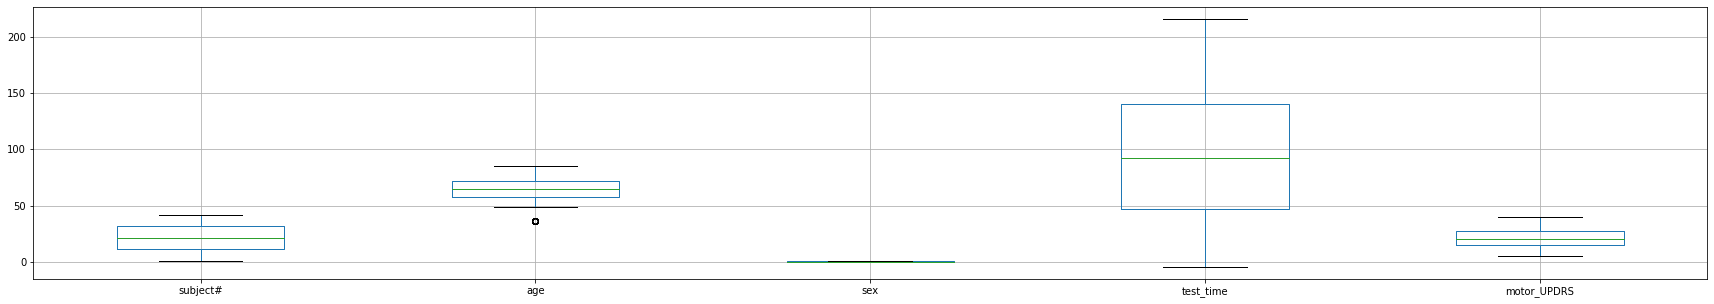

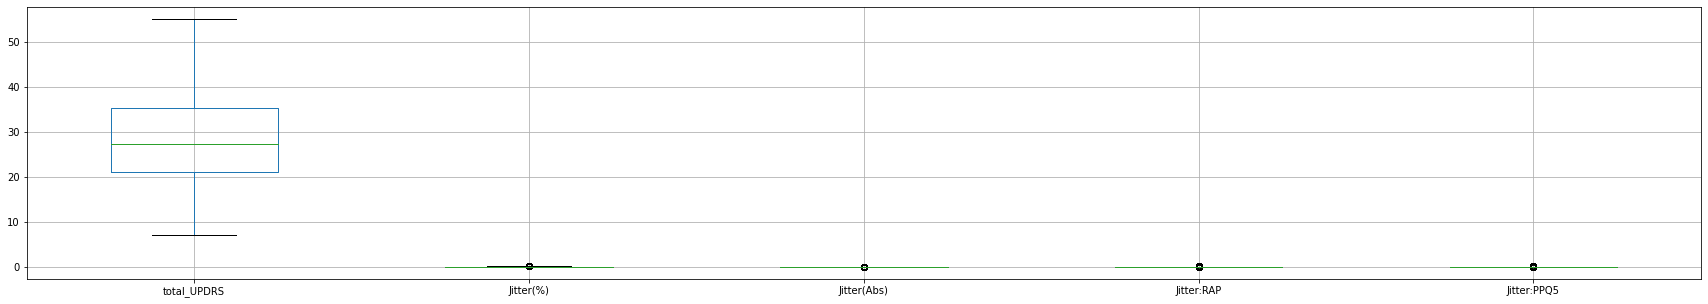

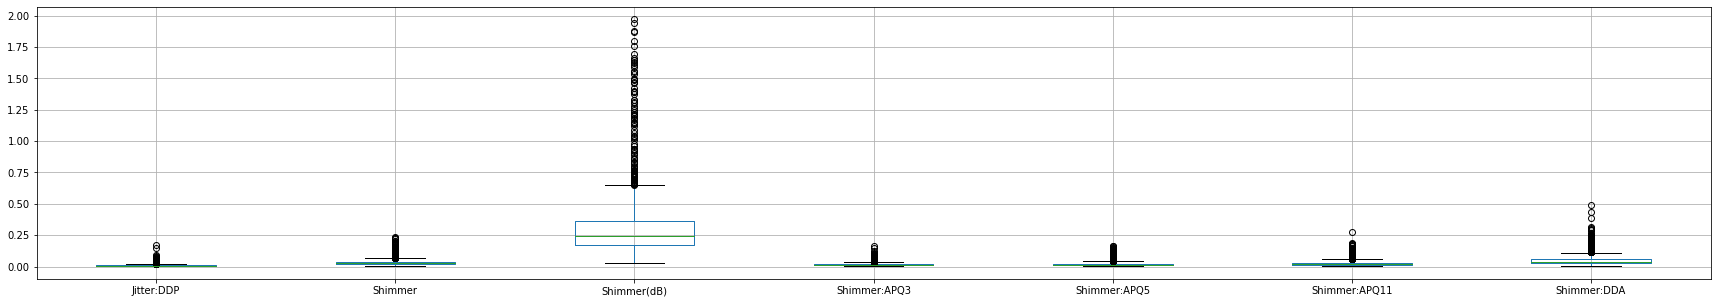

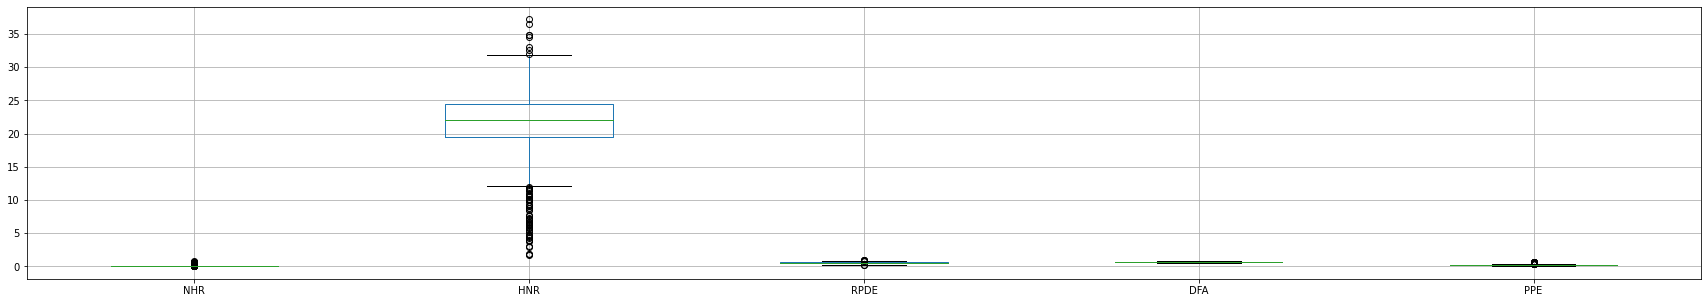

In [11]:
import matplotlib.pyplot as plt

groups = [['subject#', 'motor_UPDRS'], ['total_UPDRS', 'Jitter:PPQ5'], ['Jitter:DDP', 'Shimmer:DDA'], ['NHR', 'PPE']]
for fields in groups:
  df.loc[:, fields[0]:fields[1]].boxplot(figsize=(30,5))
  plt.show()

In [12]:
outliers = ['Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'NHR']
non_outliers = list(set(all_columns) - set(outliers))
non_outliers

['test_time',
 'Jitter:RAP',
 'total_UPDRS',
 'subject#',
 'age',
 'DFA',
 'Jitter:PPQ5',
 'motor_UPDRS',
 'PPE',
 'sex',
 'Jitter(Abs)',
 'RPDE',
 'Jitter(%)']

# Normalization

In [0]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
orig_df = df.copy()
robust_df = df.copy()
minmax_df = df.copy()

Method 1:
  - np.log
  - RobusSclar

In [0]:
def method_1_scaling(df):
  for outlier in outliers:
    robust_df[outlier] = np.log(getattr(df, outlier))

  robust_scaler = RobustScaler()
  df[all_columns] = robust_scaler.fit_transform(df[all_columns])
  return df

Method 2:
 - MinMaxScaler

In [0]:
def method_2_scaling(df):
  scaler = MinMaxScaler()
  df[all_columns] = scaler.fit_transform(df[all_columns])
  return df

In [0]:
robust_df = method_1_scaling(robust_df)
minmax_df = method_2_scaling(minmax_df)

In [0]:
robust_df.to_csv('robust_scaler.csv')
minmax_df.to_csv('minmax_scaler.csv')
orig_df.to_csv('orig.csv')

In [19]:
!ls

minmax_scaler.csv  parkinson_sample.csv  sample_data
orig.csv	   robust_scaler.csv


# Analysing data with both dataset with RobustScaler and MinMaxScaler

## RobustScaler Pairplot Analysis

For outliers datasets

In [0]:
# # note that by applying the method dropna() we drop all rows with missing values 
# sns.pairplot(data=robust_df[outliers].dropna())
# plt.show()

# note that by applying the method dropna() we drop all rows with missing values 

In [0]:
# # note that by applying the method dropna() we drop all rows with missing values 
# sns.pairplot(data=robust_df[non_outliers].dropna())
# plt.show()

## MinMaxScaler Pairplot Analysis

For Outlier

In [0]:
# # note that by applying the method dropna() we drop all rows with missing values 
# sns.pairplot(data=minmax_df[outliers].dropna())
# plt.show()

For non Outliers datasets

In [0]:
# # note that by applying the method dropna() we drop all rows with missing values 
# sns.pairplot(data=minmax_df[non_outliers].dropna())
# plt.show()

# Histograms

RobustScaler

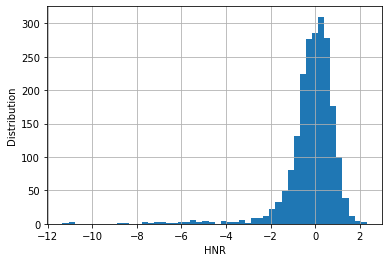

In [24]:
robust_df['HNR'].hist(bins=50)
plt.xlabel('HNR')
plt.ylabel('Distribution')
plt.show()

MinMaxScaler

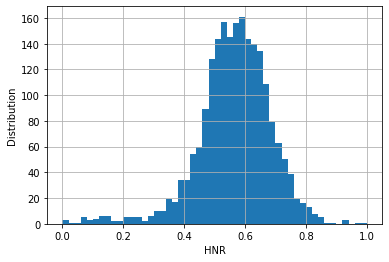

In [25]:
minmax_df['HNR'].hist(bins=50)
plt.xlabel('HNR')
plt.ylabel('Distribution')
plt.show()

Original

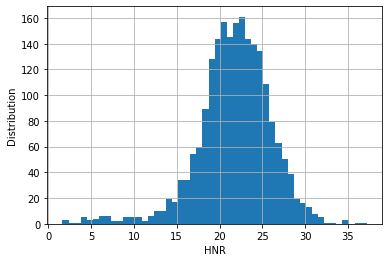

In [26]:
orig_df['HNR'].hist(bins=50)
plt.xlabel('HNR')
plt.ylabel('Distribution')
plt.show()

In [0]:
orig_df = pd.read_csv('orig.csv')
robust_df = pd.read_csv('robust_scaler.csv')
minmax_df = pd.read_csv('minmax_scaler.csv')

# From the Above it is evident that, data is getting skwed in first method. Later for the prediction, minmax_scaler datasets will be used

---



---



# K-Means Clustering

In [0]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# Clustering for Robustscalar Dataset

In [0]:
k = 3

In [0]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(robust_df)

In [0]:
data_and_centers = np.r_[robust_df,clustered_data_sklearn.cluster_centers_]

In [0]:
# XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
# print("transformation complete")

In [0]:
# clustering_scatterplot(points=XYcoordinates[:-k,:], 
#                        labels=clustered_data_sklearn.labels_, 
#                        centers=XYcoordinates[-k:,:], 
#                        title='MDS')

# Clustering for MinMaxScalar Dataset


In [0]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(minmax_df)

In [0]:
data_and_centers = np.r_[minmax_df,clustered_data_sklearn.cluster_centers_]

In [0]:
# XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
# print("transformation complete")

In [0]:
# clustering_scatterplot(points=XYcoordinates[:-k,:], 
#                        labels=clustered_data_sklearn.labels_, 
#                        centers=XYcoordinates[-k:,:], 
#                        title='MDS')

# Regression model

In [0]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [0]:
orig_df = pd.read_csv('orig.csv')
robust_df = pd.read_csv('robust_scaler.csv')
minmax_df = pd.read_csv('minmax_scaler.csv')

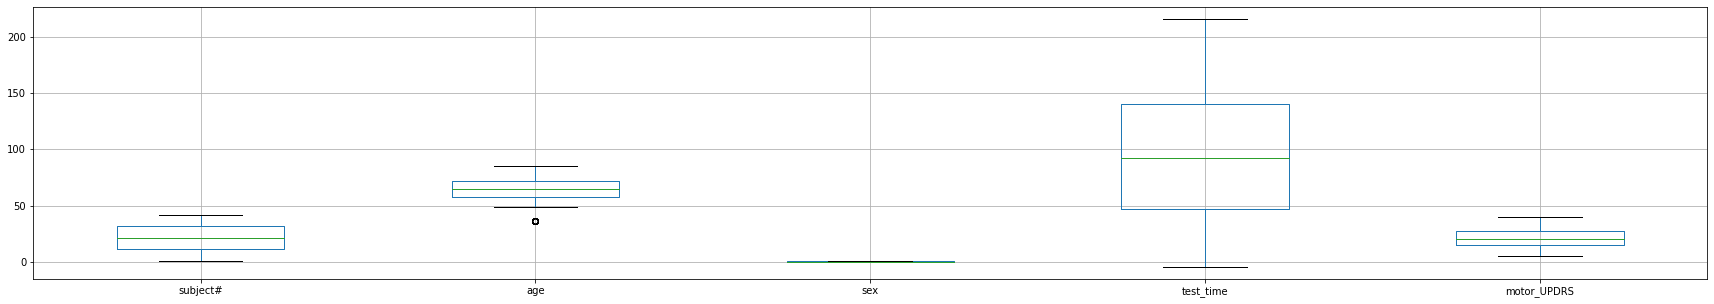

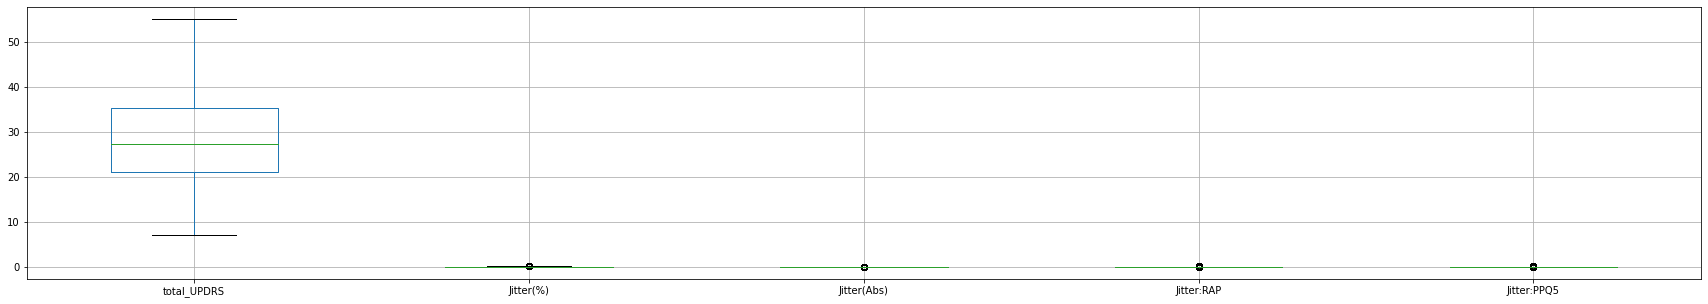

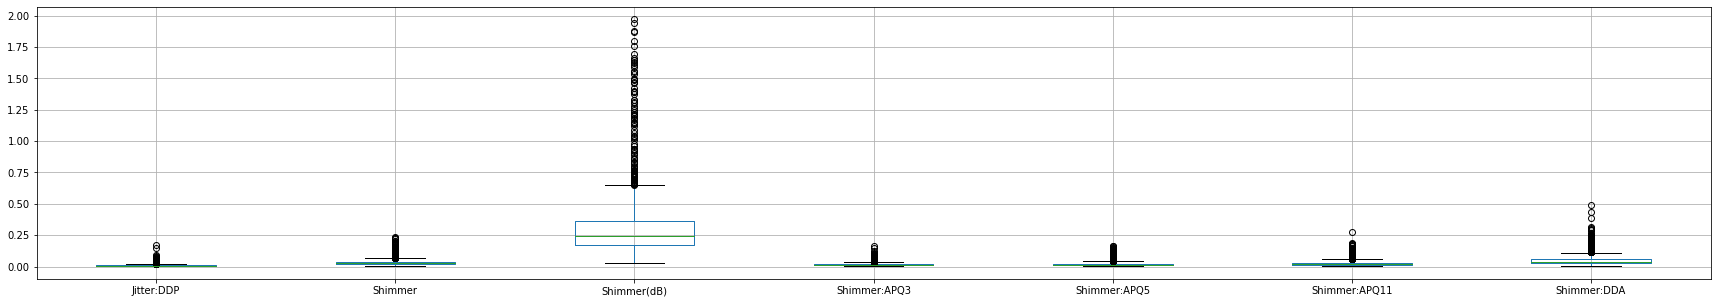

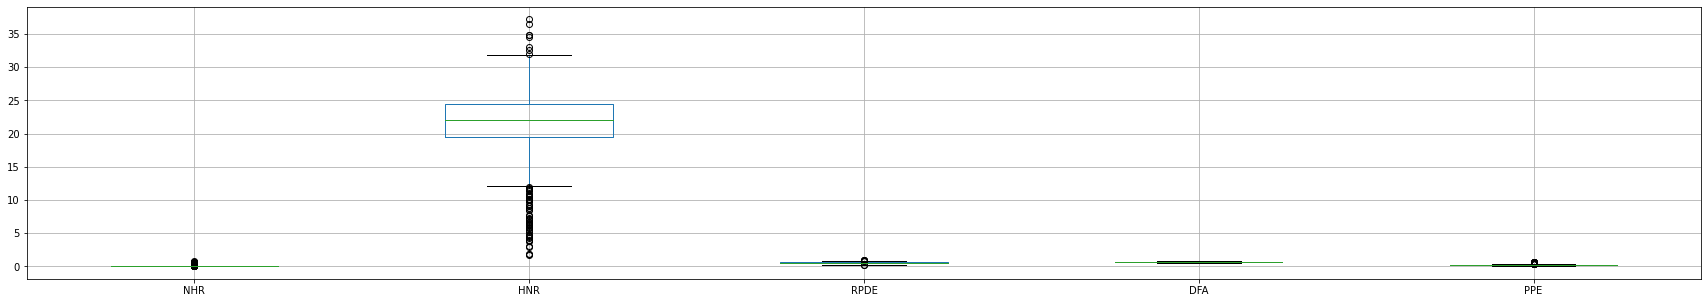

In [41]:
import matplotlib.pyplot as plt

groups = [['subject#', 'motor_UPDRS'], ['total_UPDRS', 'Jitter:PPQ5'], ['Jitter:DDP', 'Shimmer:DDA'], ['NHR', 'PPE']]
for fields in groups:
  df.loc[:, fields[0]:fields[1]].boxplot(figsize=(30,5))
  plt.show()

In [0]:
all_columns = list(orig_df.columns)
names_all = list(orig_df.columns)
names_outliers = outliers
names_no_outliers = non_outliers

In [0]:
TARGETS = ['motor_UPDRS',	'total_UPDRS'	]
TARGET = TARGETS[1]

y = orig_df[TARGET]
X = orig_df.drop(TARGET, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [44]:
y_train.shape

(1680,)

In [0]:
all_columns.remove(TARGET)
X_train = method_2_scaling(pd.DataFrame(X_train, dtype=float, columns=all_columns)).to_numpy()
X_test  = method_2_scaling(pd.DataFrame(X_test , dtype=float, columns=all_columns)).to_numpy()

y_train = MinMaxScaler().fit_transform(pd.DataFrame(y_train, columns=[TARGET]))
y_test = MinMaxScaler().fit_transform(pd.DataFrame(y_test, columns=[TARGET]))

In [0]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# #search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
# rf = RandomForestRegressor()

# search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# search.fit(X_train, y_train)

# print("Best CV score = %0.3f:" % search.best_score_)
# print("Best parameters: ", search.best_params_)

# # store the best params and best model for later use
# RF_best_params = search.best_params_
# RF_best_model = search.best_estimator_

# Evaluation

In [0]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2

In [48]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, y_test, RF_best_model)
print("RF_mse: ", RF_mse, "RF_mae: ", RF_mae, "RF_r2: ", RF_r2)

NameError: ignored

In [0]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

model = search.best_estimator_
final_model = model.fit(X, y)

# Save model

In [0]:
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))